# Classify iris plants into three species

###### Importing libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

###### Reading the input csv file and displaying first 10 data points.

In [79]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, names=col_names)
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


###### Data set description

In [80]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###### Sepal length vs. Sepal width

Cyan: Iris-setosa 
Magenta: Iris-versicolor 
Green: Iris-virginica


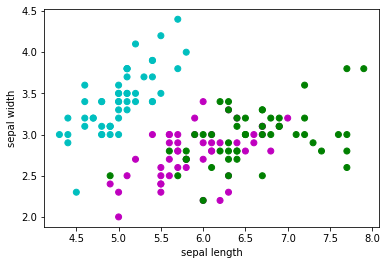

In [81]:
scatter_color= ['c' if l == 'Iris-setosa' else 'm' if l=='Iris-versicolor' else 'g' for l in iris_df['species']]
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], color=scatter_color)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
print("Cyan: Iris-setosa \nMagenta: Iris-versicolor \nGreen: Iris-virginica")

###### Petal length vs. Petal width

Cyan: Iris-setosa 
Magenta: Iris-versicolor 
Green: Iris-virginica


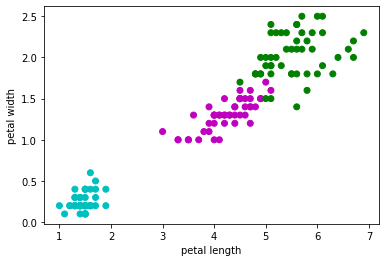

In [82]:
scatter_color= ['c' if l == 'Iris-setosa' else 'm' if l=='Iris-versicolor' else 'g' for l in iris_df['species']]
plt.scatter(iris_df['petal_length'], iris_df['petal_width'], color=scatter_color)
plt.xlabel('petal length')
plt.ylabel('petal width')
print("Cyan: Iris-setosa \nMagenta: Iris-versicolor \nGreen: Iris-virginica")

###### Sepal length vs. Petal length

Cyan: Iris-setosa 
Magenta: Iris-versicolor 
Green: Iris-virginica


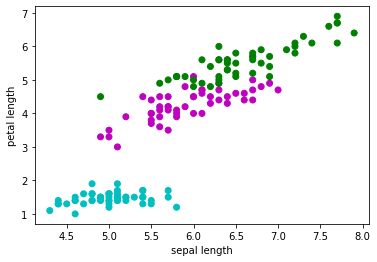

In [83]:
scatter_color= ['c' if l == 'Iris-setosa' else 'm' if l=='Iris-versicolor' else 'g' for l in iris_df['species']]
plt.scatter(iris_df['sepal_length'], iris_df['petal_length'], color=scatter_color)
plt.xlabel('sepal length')
plt.ylabel('petal length')
print("Cyan: Iris-setosa \nMagenta: Iris-versicolor \nGreen: Iris-virginica")

###### Sepal width vs. Petal width

Cyan: Iris-setosa 
Magenta: Iris-versicolor 
Green: Iris-virginica


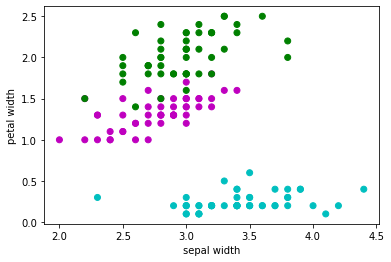

In [84]:
scatter_color= ['c' if l == 'Iris-setosa' else 'm' if l=='Iris-versicolor' else 'g' for l in iris_df['species']]
plt.scatter(iris_df['sepal_width'], iris_df['petal_width'], color=scatter_color)
plt.xlabel('sepal width')
plt.ylabel('petal width')
print("Cyan: Iris-setosa \nMagenta: Iris-versicolor \nGreen: Iris-virginica")

###### Checking for null values

In [85]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###### Separating features and labels in x and y

In [86]:
x = iris_df.iloc[:,:-1].values
y = iris_df.iloc[:,-1].values

###### Printing features

In [87]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

###### Printing labels

In [88]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

###### Labels are categorical, so encoding them using Label Encoder

In [89]:
le = LabelEncoder()
y = le.fit_transform(y)

###### Printing labels after encoding

In [90]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Train Test Split

###### Splitting the dataset into train and test set

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

###### Printing the features of train set

In [92]:
print(x_train)

[[6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.8 4.  1.2 0.2]
 [6.1 2.8 4.  1.3]
 [5.4 3.7 1.5 0.2]
 [4.8 3.  1.4 0.1]
 [7.2 3.2 6.  1.8]
 [7.9 3.8 6.4 2. ]
 [5.1 3.3 1.7 0.5]
 [5.7 4.4 1.5 0.4]
 [6.1 2.9 4.7 1.4]
 [5.  3.6 1.4 0.2]
 [5.6 3.  4.1 1.3]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [5.6 2.5 3.9 1.1]
 [5.7 2.6 3.5 1. ]
 [6.4 2.7 5.3 1.9]
 [5.1 3.8 1.6 0.2]
 [5.1 3.5 1.4 0.2]
 [5.  3.4 1.6 0.4]
 [6.9 3.2 5.7 2.3]
 [7.7 2.8 6.7 2. ]
 [6.3 3.4 5.6 2.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.9 4.3 1.3]
 [5.8 2.7 3.9 1.2]
 [5.5 2.5 4.  1.3]
 [6.3 3.3 4.7 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.4 1.5 0.4]
 [6.7 3.3 5.7 2.1]
 [5.8 2.7 5.1 1.9]
 [7.6 3.  6.6 2.1]
 [5.5 3.5 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [6.4 2.8 5.6 2.1]
 [6.4 3.2 4.5 1.5]
 [6.6 3.  4.4 1.4]
 [6.3 2.5 4.9 1.5]
 [5.3 3.7 1.5 0.2]
 [4.4 3.  1.3 0.2]
 [5.8 2.7 4.1 1. ]
 [5.7 2.5 5.  2. ]
 [4.3 3.  1.1 0.1]
 [5.4 3.4 1.7 0.2]
 [5.1 2.5 3.  1.1]
 [5.1 3.5 1.4 0.3]
 [6.3 2.9 5.6 1.8]
 [4.9 3.1 1.5 0.1]
 [6.4 2.8 5.6 2.2]
 [4.6 3.4 1.4 0.3]
 [5.8 2.6 4.

###### Printing the features of test set

In [93]:
print(x_test)

[[5.4 3.9 1.7 0.4]
 [4.5 2.3 1.3 0.3]
 [5.5 2.6 4.4 1.2]
 [5.7 2.8 4.5 1.3]
 [5.4 3.9 1.3 0.4]
 [4.9 2.5 4.5 1.7]
 [5.6 2.8 4.9 2. ]
 [5.  3.  1.6 0.2]
 [6.3 2.7 4.9 1.8]
 [5.6 3.  4.5 1.5]
 [6.1 3.  4.9 1.8]
 [4.4 3.2 1.3 0.2]
 [4.7 3.2 1.6 0.2]
 [6.5 3.  5.2 2. ]
 [5.5 2.3 4.  1.3]
 [5.7 3.  4.2 1.2]
 [6.2 2.2 4.5 1.5]
 [6.  3.4 4.5 1.6]
 [6.3 3.3 6.  2.5]
 [6.3 2.8 5.1 1.5]
 [5.5 2.4 3.8 1.1]
 [5.  3.4 1.5 0.2]
 [4.6 3.6 1.  0.2]
 [5.1 3.7 1.5 0.4]
 [5.1 3.8 1.9 0.4]
 [6.4 3.1 5.5 1.8]
 [4.9 2.4 3.3 1. ]
 [4.8 3.4 1.9 0.2]
 [5.  2.  3.5 1. ]
 [6.4 3.2 5.3 2.3]]


###### Printing labels of train set

In [94]:
print(y_train)

[1 0 0 1 0 0 2 2 0 0 1 0 1 2 1 1 1 2 0 0 0 2 2 2 1 1 1 1 1 1 0 2 2 2 0 0 2
 1 1 1 0 0 1 2 0 0 1 0 2 0 2 0 1 1 2 1 2 2 1 0 2 0 0 2 0 1 1 2 2 2 0 0 2 0
 0 0 1 2 2 0 1 1 1 0 0 0 2 1 2 2 0 2 1 2 2 0 0 0 1 2 2 1 1 2 2 2 2 1 2 1 1
 2 0 2 2 1 1 1 1 0]


###### Printing labels of test set

In [95]:
print(y_test)

[0 0 1 1 0 2 2 0 2 1 2 0 0 2 1 1 1 1 2 2 1 0 0 0 0 2 1 0 1 2]


## K Neighbors Classification

###### Importing library KNeighborsClassifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier

### K Neighbors Classification - 3 Neighbors

###### Classifying the model using KNeighborsClassifier with 3 neighbors

In [97]:
iris_neighbors = KNeighborsClassifier(n_neighbors=3)
iris_neighbors.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

###### Predicting the species on the features of test set

In [98]:
iris_prediction = iris_neighbors.predict(x_test)
iris_prediction

array([0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 2])

###### True Values vs. Prediction

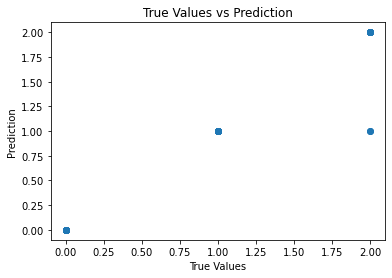

In [99]:
plt.scatter(y_test, iris_prediction)
plt.title("True Values vs Prediction")
plt.xlabel("True Values")
plt.ylabel("Prediction")
plt.show()

###### Calculating the accuracy score using Sci-kit learn library

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, iris_prediction)

0.9333333333333333

###### Printing the confusion matrix using Sci-kit learn library

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, iris_prediction)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  7]])

###### Printing the classification report using Sci-kit learn library

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, iris_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



### K Neighbors Classification - 1 to 40 Neighbors

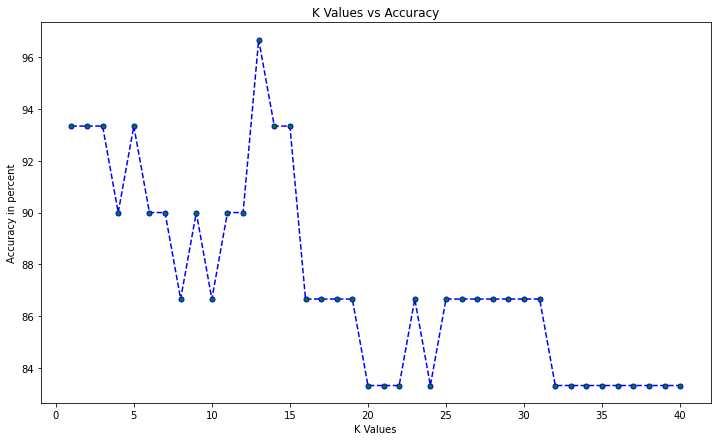

In [103]:
###### Classifying the model using KNeighborsClassifier with 1 to 40 neighbors
###### Predicting the species on the features of test set

neighbors40 = []
for i in range(1, 41):
    classifier40 = KNeighborsClassifier(n_neighbors=i)
    classifier40.fit(x_train, y_train)
    prediction40 = classifier40.predict(x_test)
    neighbors40.append(accuracy_score(y_test, prediction40)*100)

###### True Values vs. Prediction

plt.figure(figsize=(12, 7))
plt.plot(range(1, 41), neighbors40, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=5)
plt.title("K Values vs Accuracy")
plt.xlabel("K Values")
plt.ylabel("Accuracy in percent")
plt.show()

### K Neighbors Classification - 7 Neighbors

In [104]:
iris_neighbors = KNeighborsClassifier(n_neighbors=7)
iris_neighbors.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [105]:
iris_prediction = iris_neighbors.predict(x_test)
iris_prediction

array([0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 2])

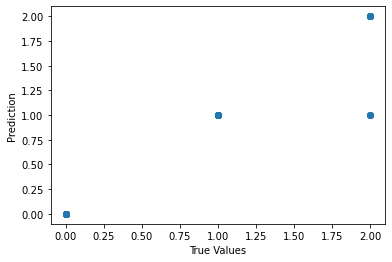

In [106]:
plt.scatter(y_test, iris_prediction)
plt.xlabel("True Values")
plt.ylabel("Prediction")
plt.show()

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, iris_prediction)

0.9

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, iris_prediction)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  3,  6]])

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, iris_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.77      1.00      0.87        10
           2       1.00      0.67      0.80         9

    accuracy                           0.90        30
   macro avg       0.92      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



In [110]:
iris_neighbors = KNeighborsClassifier(n_neighbors=7)
iris_neighbors.fit(x_train, y_train)
iris_prediction = iris_neighbors.predict([[5.0,2.0,3.5,1.0] , [6.5,3.2,5.1,2.0] , [5.4,3.7,1.5,0.2]])
print(iris_prediction)

[1 2 0]
